In [1]:
from simulating_traces.Simulate_measurement import *
import matplotlib.pyplot as plt

## Import data

In [2]:
import json
id_1=2
with open('JPA_off_vs_power_'+str(id_1)+'.json', 'r') as file:
    signal_parameters_fit_read=json.load(file)

## Generate new traces

In [122]:
# Generates distance

# SIMULATION- CREATE DATA

A=signal_parameters_fit_read["A"]
t_in=signal_parameters_fit_read["t_in"]
t_out=signal_parameters_fit_read["t_out"]


E_low=signal_parameters_fit_read["mean_bg"]
E_high=signal_parameters_fit_read["mean_up"]
sigma_low=signal_parameters_fit_read["std_bg"]
sigma_high=signal_parameters_fit_read["std_up"]

E_low=0
E_high=1
sigma_low=0.1
sigma_high=0.1



n_traces=100
t_max=2000
acq_rate=200

time,spin_traces,spin_number=simulate_measurement(A, t_out, t_in, E_low, sigma_low , E_high, sigma_high,	 n_traces, t_max, acq_rate)

In [123]:
t_in

439.4829850723389

In [124]:
t_out

52.616843137535675

In [125]:
len(time)

400000

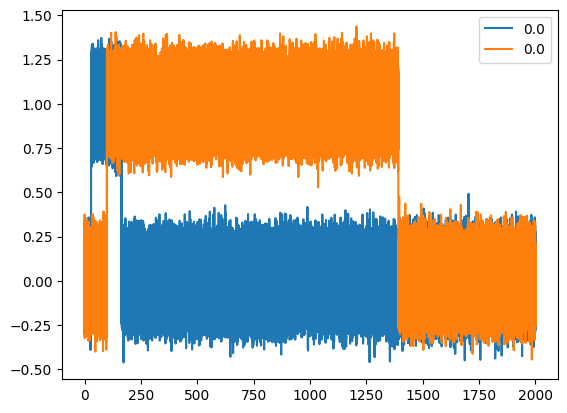

In [126]:

plt.plot(time, spin_traces[0], label=spin_number[0])
plt.plot(time, spin_traces[1], label=spin_number[1])
plt.legend()

## apply filter

In [127]:
factor=10
time_filtered, spin_traces_filtered, meas_bw=moving_avg_filter(spin_traces, time, factor, acq_rate)

In [128]:
time_filtered

array([4.7500000e-02, 5.2500000e-02, 5.7500000e-02, ..., 1.9999875e+03,
       1.9999925e+03, 1.9999975e+03])

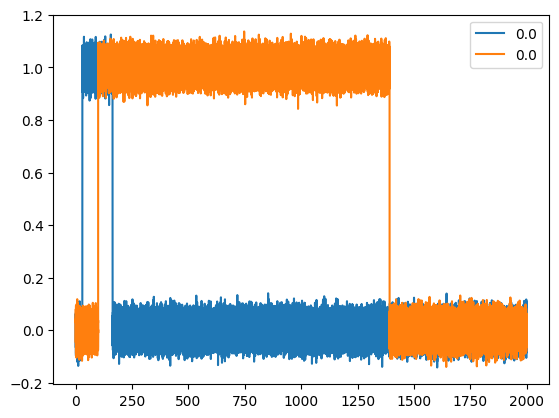

In [129]:
plt.plot(time_filtered,spin_traces_filtered[0], label=spin_number[0])
plt.plot(time_filtered,spin_traces_filtered[1], label=spin_number[1])
plt.legend()